# Primeira Questão - Classificação

## Sumário
* Bibliotecas
* Base de Dados
* Pré-Processamento
    * Informações Gerais
    * Dados Ausentes
    * Dados Duplicados 
    * Dados Não Numéricos
    * Correlação
    * Identificando Outliers
    * Análise do Balanceamento dos Atributos
* Normalização dos Dados
* Aplicação dos Algoritmos de Aprendizagem de Máquina
* Alteração no Parâmetros dos Algoritmos de Aprendizagem de Máquina
* Conclusão
    
 

# Bibliotecas

Primeiramente, é necessário realizar a importação das dependências que serão utilizadas no código.

In [141]:
from scipy.io import arff
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, neighbors, model_selection, metrics, svm, decomposition, manifold, multiclass


# Base de Dados

Aqui está sendo realizada a leitura da base de dados.

In [3]:
base = arff.loadarff('multilabel-classification-emotions/emotions.arff') 
df_base = pd.DataFrame(base[0])
df_base.head()


,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,b'0',b'1',b'1',b'0',b'0',b'0'
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,b'0',b'1',b'0',b'0',b'0',b'1'
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,b'0',b'0',b'1',b'0',b'0',b'0'
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,b'0',b'0',b'0',b'1',b'0',b'0'


A base de dados possui 78 atributos. Sendo 72 os atributos de entrada e 6 os atributos alvo. Tendo em vista isso, podemos concluir que a base possui uma alta dimensionalidade.

Não é tão nítida as informações que os atributos de entrada querem explicar, tanto em relação as instâncias quanto as classificações.   

# Pré-Processamento

Antes de tudo, é necessário realizar o pré-processamento da base de dados. Pois é necessário para a preparação, organização e estruturação dos dados. 

## Informações gerais

In [4]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 78 columns):
Mean_Acc1298_Mean_Mem40_Centroid    593 non-null float64
Mean_Acc1298_Mean_Mem40_Rolloff     593 non-null float64
Mean_Acc1298_Mean_Mem40_Flux        593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_0      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_1      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_2      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_3      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_4      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_5      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_6      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_7      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_8      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_9      593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_10     593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_11     593 non-null float64
Mean_Acc1298_Mean_Mem40_MFCC_12     593 

Com as informações obtidas da base de dados, se tem que 72 são atributos numéricos e 6 são atributos não numéricos. Posteriormente, esses atributos não numéricos serão tratados.

## Dados Ausentes

Verificar se os atributos da base de dados possui alguma instância que não tem valor. 

In [5]:
pd.set_option('display.max_rows', None)
df_base.isnull().sum()


Mean_Acc1298_Mean_Mem40_Centroid    0
Mean_Acc1298_Mean_Mem40_Rolloff     0
Mean_Acc1298_Mean_Mem40_Flux        0
Mean_Acc1298_Mean_Mem40_MFCC_0      0
Mean_Acc1298_Mean_Mem40_MFCC_1      0
Mean_Acc1298_Mean_Mem40_MFCC_2      0
Mean_Acc1298_Mean_Mem40_MFCC_3      0
Mean_Acc1298_Mean_Mem40_MFCC_4      0
Mean_Acc1298_Mean_Mem40_MFCC_5      0
Mean_Acc1298_Mean_Mem40_MFCC_6      0
Mean_Acc1298_Mean_Mem40_MFCC_7      0
Mean_Acc1298_Mean_Mem40_MFCC_8      0
Mean_Acc1298_Mean_Mem40_MFCC_9      0
Mean_Acc1298_Mean_Mem40_MFCC_10     0
Mean_Acc1298_Mean_Mem40_MFCC_11     0
Mean_Acc1298_Mean_Mem40_MFCC_12     0
Mean_Acc1298_Std_Mem40_Centroid     0
Mean_Acc1298_Std_Mem40_Rolloff      0
Mean_Acc1298_Std_Mem40_Flux         0
Mean_Acc1298_Std_Mem40_MFCC_0       0
Mean_Acc1298_Std_Mem40_MFCC_1       0
Mean_Acc1298_Std_Mem40_MFCC_2       0
Mean_Acc1298_Std_Mem40_MFCC_3       0
Mean_Acc1298_Std_Mem40_MFCC_4       0
Mean_Acc1298_Std_Mem40_MFCC_5       0
Mean_Acc1298_Std_Mem40_MFCC_6       0
Mean_Acc1298

Não há atributos ausentes na base de dados. Portanto, nenhuma ação será tomada quanto a dados ausentes.

## Dados Duplicados

Verificar se existem dados duplicados na base. 

In [6]:
df_base[df_base.duplicated(keep = False)]

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive


Não há dados duplicados na base. Sendo assim, nenhuma ação será tomada para realizar a remoção de dados duplicados. 

## Dados Não Numéricos

Como dito anteriormente, os únicos atributos não numéricos da base de dados são os atributos alvos e eles precisam ser tratados. Agora será mostrado os valores pertencentes a esses atributos. 

In [7]:
labels = ['amazed-suprised', 'happy-pleased', 'relaxing-calm', 'quiet-still',
       'sad-lonely', 'angry-aggresive']

for label in labels:
    print("Valores dos atributos:", label,":", df_base[label].unique(), "\n")


Valores dos atributos: amazed-suprised : [b'0' b'1'] 

Valores dos atributos: happy-pleased : [b'1' b'0'] 

Valores dos atributos: relaxing-calm : [b'1' b'0'] 

Valores dos atributos: quiet-still : [b'0' b'1'] 

Valores dos atributos: sad-lonely : [b'0' b'1'] 

Valores dos atributos: angry-aggresive : [b'0' b'1'] 



Cada atributo alvo possui dois valores distintos, que são: **b'0' e b'1'**. Para melhorar o mapeamento desses valores na base de dados, eles serão relacionados a valores numéricos. O valor **b'0'** a **0** e o valor **b'1'** a **1**

In [8]:
atributos = {
    "b'0'": 0,
    "b'1'": 1
}


In [9]:
df_base["amazed-suprised"] = df_base["amazed-suprised"].apply(lambda atri: atributos[str(atri)])
df_base["happy-pleased"] = df_base["happy-pleased"].apply(lambda atri: atributos[str(atri)])
df_base["relaxing-calm"] = df_base["relaxing-calm"].apply(lambda atri: atributos[str(atri)])
df_base["quiet-still"] = df_base["quiet-still"].apply(lambda atri: atributos[str(atri)])
df_base["sad-lonely"] = df_base["sad-lonely"].apply(lambda atri: atributos[str(atri)])
df_base["angry-aggresive"] = df_base["angry-aggresive"].apply(lambda atri: atributos[str(atri)])


In [10]:
df_base.head(2)

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,0,1,1,0,0,0
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,1,0,0,0,0,1


Revendo a base de dados, os valores dos atributos de saída foram mudados conforme a relação de mapeamento que foi aplicada. 

## Correlação

Como a base de dados possui uma alta dimensionalidade, a primeira plotagem da correlação será feita em formato de mapa de color.

In [11]:
def plot_corr(corr):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, 1)] = True    
    sns.heatmap(corr, mask=mask, cmap='RdBu', square=True, linewidths=.5)
corr = df_base.corr() 

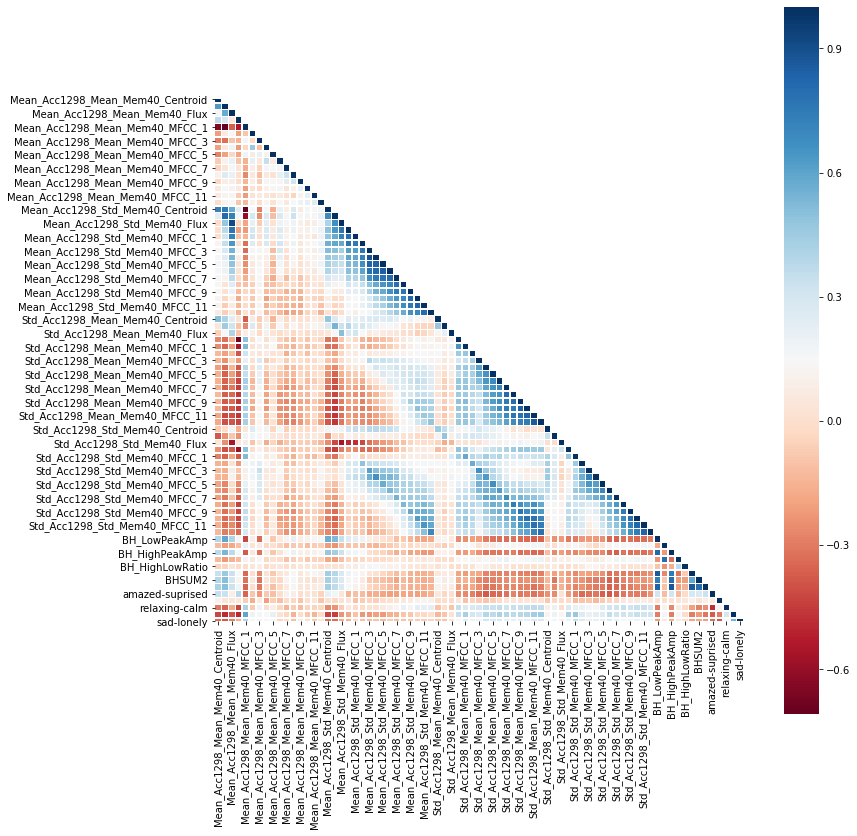

In [12]:
f, ax = plt.subplots(figsize = (12, 13))
plot_corr(corr)


A matriz de correlação só foi mostrada pela metade, porque a parte que foi retirada só é um espellho da matriz. 

As correlações positivas são representadas pela cor azul, já o vermelho representa as correlações negativas.

Para uma melhor visualização numérica das correlações, será feita uma correlação entre os atributos de entrada e os atributos de saída. E está sendo feito dessa forma devido a alta dimensionalidade da base.

obs: o mapa de correlação não aparece no relatório (não sei o porquê), mas o mesmo aparece na página da referente questão no github.

In [151]:
correl = df_base.corr().iloc[ : -6, -6: ]
correl.style.background_gradient(cmap = 'coolwarm')


,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
Mean_Acc1298_Mean_Mem40_Centroid,0.345763,0.108973,-0.305083,-0.424649,-0.335437,0.267874
Mean_Acc1298_Mean_Mem40_Rolloff,0.339501,0.0312514,-0.348233,-0.491562,-0.380406,0.375731
Mean_Acc1298_Mean_Mem40_Flux,0.0995083,0.0381931,-0.171167,-0.393341,-0.286426,0.278627
Mean_Acc1298_Mean_Mem40_MFCC_0,0.383036,0.0456017,-0.424995,-0.492264,-0.163028,0.413489
Mean_Acc1298_Mean_Mem40_MFCC_1,-0.347632,-0.0706246,0.415806,0.597033,0.401008,-0.455261
Mean_Acc1298_Mean_Mem40_MFCC_2,-0.0918324,-0.160563,-0.0769074,0.189363,0.129448,0.0652834
Mean_Acc1298_Mean_Mem40_MFCC_3,-0.220566,0.0712478,0.190066,0.16152,0.17482,-0.190563
Mean_Acc1298_Mean_Mem40_MFCC_4,-0.0809502,-0.211555,-0.00334488,0.150739,0.147596,0.0176273
Mean_Acc1298_Mean_Mem40_MFCC_5,-0.106724,-0.0658283,0.0862056,0.211173,0.144831,-0.147237
Mean_Acc1298_Mean_Mem40_MFCC_6,-0.012209,-0.11129,-0.0393416,0.0145314,-0.0428849,0.115362


Devido ao alta dimensionalida da base, se vê necessário mostrar as maiores correlações do atributos de saída com os atributos de entrada. A seguir, é possível verificar a distribuição das correlações.

In [14]:

correl_in = df_base.corr().iloc[:-6,-6:]

c = correl_in.abs()

s = c.unstack()
so = s.sort_values(kind = "quicksort")

print(so[-72:-6])

sad-lonely       Mean_Acc1298_Std_Mem40_Rolloff      0.328327
amazed-suprised  Std_Acc1298_Mean_Mem40_MFCC_3       0.329109
relaxing-calm    Std_Acc1298_Mean_Mem40_MFCC_5       0.329782
amazed-suprised  BHSUM3                              0.330663
                 Std_Acc1298_Std_Mem40_MFCC_2        0.333448
sad-lonely       Mean_Acc1298_Mean_Mem40_Centroid    0.335437
amazed-suprised  Std_Acc1298_Mean_Mem40_MFCC_6       0.337899
                 Mean_Acc1298_Mean_Mem40_Rolloff     0.339501
relaxing-calm    Std_Acc1298_Std_Mem40_MFCC_10       0.340791
                 Std_Acc1298_Mean_Mem40_MFCC_8       0.343373
                 Std_Acc1298_Std_Mem40_MFCC_11       0.343449
                 Std_Acc1298_Mean_Mem40_MFCC_9       0.344364
amazed-suprised  Std_Acc1298_Mean_Mem40_MFCC_5       0.344394
sad-lonely       Std_Acc1298_Std_Mem40_MFCC_1        0.344623
relaxing-calm    Std_Acc1298_Mean_Mem40_MFCC_4       0.345096
amazed-suprised  Mean_Acc1298_Mean_Mem40_Centroid    0.345763
        

Percebe-se que pouquíssimos atributos possuem uma correlação maior que 0.4




Agora será realizada uma correlação entre os atributos de entrada.

In [15]:
#correl_in = df_base.corr().iloc[:72,:72]
#correl_in.style.background_gradient(cmap = 'coolwarm')


def plot_corr(corr):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, 1)] = True    
    sns.heatmap(corr, mask=mask, cmap='RdBu', square=True, linewidths=.5)# Calculando a correlação
correl = df_base.corr().iloc[:72,:72]

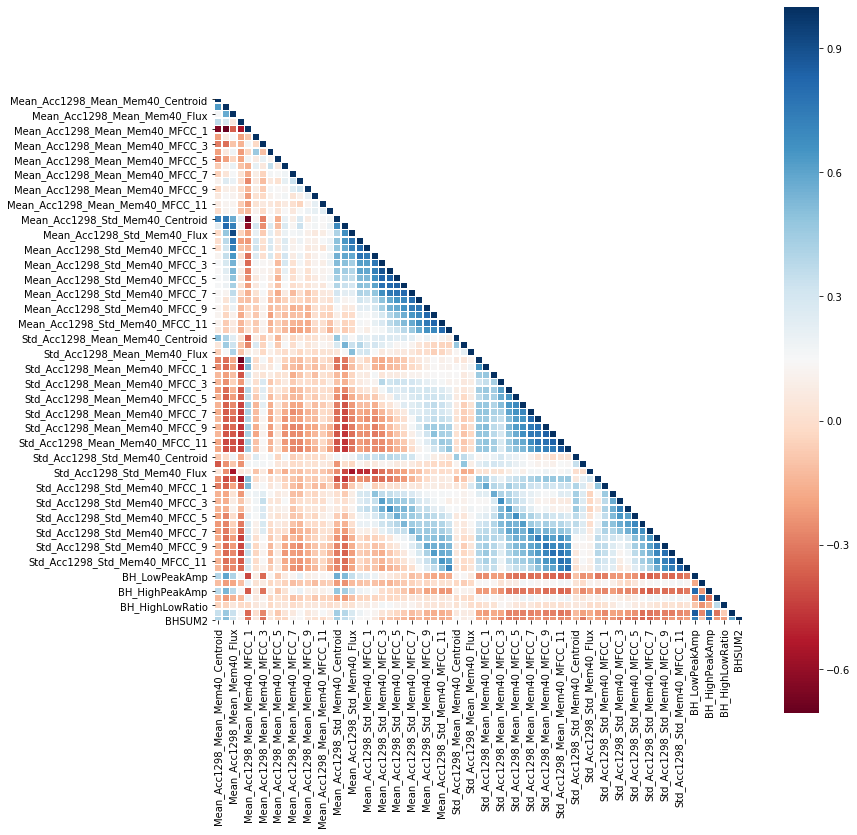

In [16]:
f, ax = plt.subplots(figsize = (12, 13))
plot_corr(correl)

Novamente, as correlações positivas estão na cor azul e as negativas na cor vermelha.


Como são muitos atributos de entrada, as maiores correlações entre eles serão ordenadas. 

In [17]:
correl_in = df_base.corr().iloc[:72,:72]

c = correl_in.abs()

s = c.unstack()
so = s.sort_values(kind = "quicksort")

print(so[-120:-72])

BH_HighPeakAmp                   BHSUM2                             0.800536
BHSUM2                           BH_HighPeakAmp                     0.800536
BHSUM3                           BHSUM2                             0.800814
BHSUM2                           BHSUM3                             0.800814
Mean_Acc1298_Std_Mem40_MFCC_12   Mean_Acc1298_Std_Mem40_MFCC_11     0.803408
Mean_Acc1298_Std_Mem40_MFCC_11   Mean_Acc1298_Std_Mem40_MFCC_12     0.803408
Std_Acc1298_Mean_Mem40_MFCC_7    Std_Acc1298_Mean_Mem40_MFCC_8      0.804741
Std_Acc1298_Mean_Mem40_MFCC_8    Std_Acc1298_Mean_Mem40_MFCC_7      0.804741
Mean_Acc1298_Mean_Mem40_Rolloff  Mean_Acc1298_Std_Mem40_Rolloff     0.809104
Mean_Acc1298_Std_Mem40_Rolloff   Mean_Acc1298_Mean_Mem40_Rolloff    0.809104
Mean_Acc1298_Std_Mem40_MFCC_6    Mean_Acc1298_Std_Mem40_MFCC_7      0.810537
Mean_Acc1298_Std_Mem40_MFCC_7    Mean_Acc1298_Std_Mem40_MFCC_6      0.810537
BH_LowPeakAmp                    BH_HighPeakAmp                     0.816633

Esses são os pares que possuem correlações acima de 0.8

A partir disso, é possível que técnicas para a redução da dimensionalidade da base possam ser utilizadas, pois muito atributos estão com as mesmas informações. 

## Identificando Outliers

Devido a alta dimensionalidade da base de dados, o _boxplot_  não será aplicado para identificar os outliers. Pois se utilizado esse método, tanto a visualização quanto análise não seriam realizadas da melhor maneira possível. 

Tendo em vista isso, os outliers serão identificados por meio da métrica _Z-score_. Esta métrica descreve um ponto em termos de sua relação com a média e o desvio padrão de um grupo de pontos. Os valores mapeados como **0** significa que o valor é identico a média. Já os valores mapeados como **1** indicam que são valores que estão no desvio padrão da média. Ou seja, qualquer ponto muito distante de zero pode ser considerado um outlier. 


Atributos com outliers: 70 (Porcentagem = 0.90)

Total de outliers: 486


Text(0.5, 1.0, 'Quantidade de Outliers por atributos')

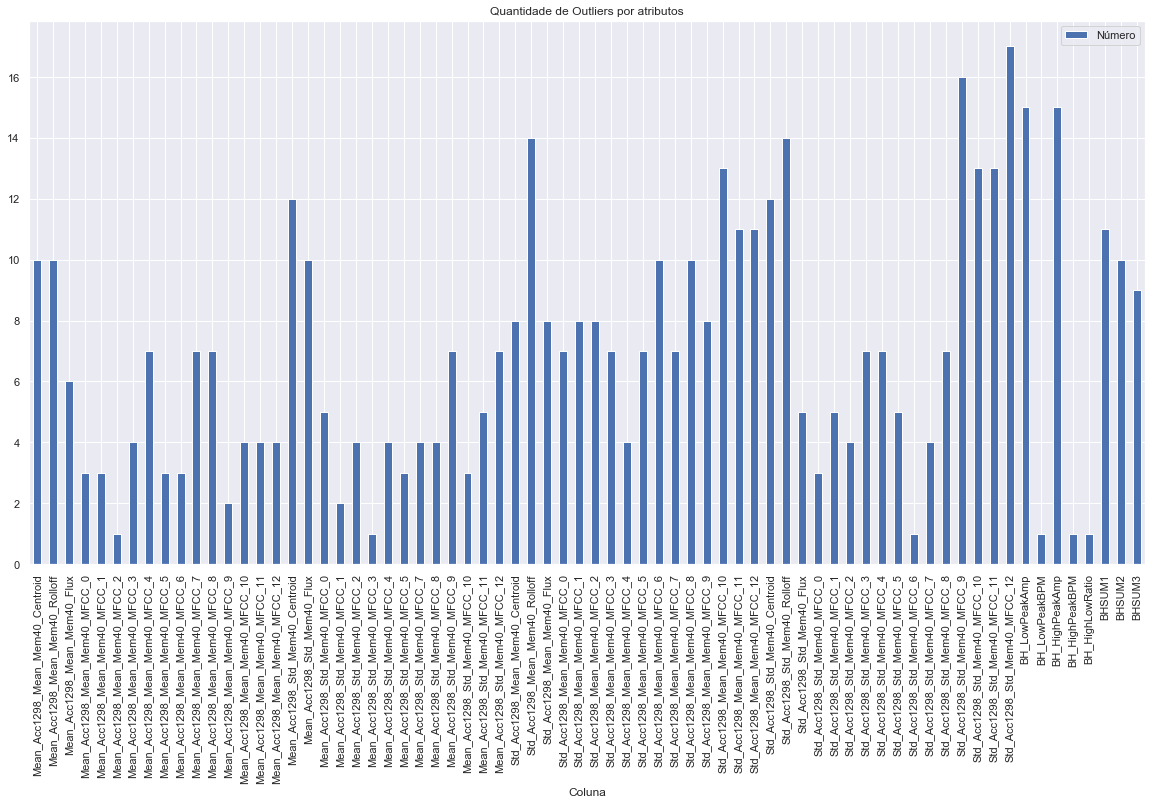

In [154]:
threshold = 3
outliers = []
total = 0
resultado = []

for col in df_base.columns:
    outlier = len(df_base[(np.abs(stats.zscore(df_base[col]))>= threshold)])
    total += outlier
    if(outlier>0):
        outliers.append(df_base[(np.abs(stats.zscore(df_base[col])) >= threshold)])
        resultado.append({"Número":len(df_base[(np.abs(stats.zscore(df_base[col]))>= threshold)]), "Coluna": col})
        
print("\nAtributos com outliers: %d (Porcentagem = %.2f)" % (len(outliers), len(outliers)/len(df_base.columns)))
print("\nTotal de outliers: %d" % (total))

pd.DataFrame(resultado).plot.bar(x = "Coluna", y = "Número", figsize = (20, 10))
plt.title("Quantidade de Outliers por atributos")

A base de dados possui 486 outliers, e 70 de 78 atributos possuem outliers. 

Pela plotagem do gráfico, podemos ver os atributos que possuem outliers. Como muitos atributos têm outliers, é de imaginar que muitas instâncias possuem outliers. Como não se sabe o que esses atributos de entrada significam, os outleirs serão mantidos na base de dados. 

Por serem muitos outliers, não se tem ideia se a sua remoção pode gerar impactos drásticos na base de dados.  


## Análise de Balanceamento dos Atributos

Será verificado o balanceamento entre os atributos de saída. E um gráfico irá mostrar suas quantidades de valores.

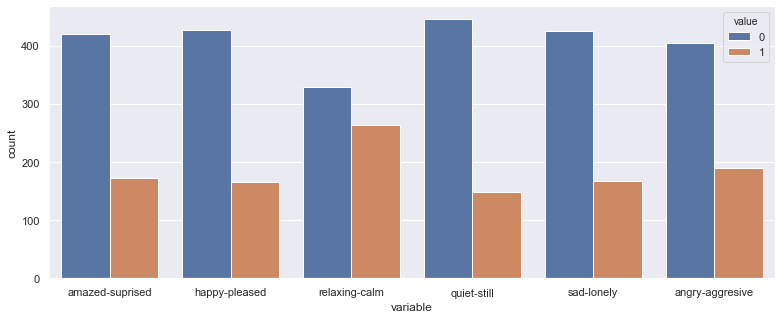

In [19]:
sns.set(rc = {'figure.figsize':(13, 5)})
sns.countplot(x='variable',hue = 'value',data = pd.melt(df_base[labels]))

Percebe-se que os atributos de saída estão desbalanceados. 

No entanto, não será realizado um balanceamento, visto que um balanceamento **undersampling**, neste caso, poderia eliminar dados de classes, que não se tem informação se são importantes ou não. 

E um balanceamento **oversampling** poderia duplicar dados que já existem. E isso não é necessário, neste caso. 

Dessa forma, os atributos serão mantidos da maneira que estão.


# Normalização dos Dados

A aplicação da normalização dos dados se faz necessário para evitar que alguns atributos predominem sobre outros.

Para a normalização dos dados será utilizado o RobustScaler. Pois esse tipo de normalização lida melhor com outliers, já que os mesmos não foram tratados.

In [20]:
normal = preprocessing.RobustScaler()
normalizado = pd.DataFrame(normal.fit_transform(df_base), columns = df_base.columns.values)

normalizado.head()


,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,-0.735021,-0.534210,0.616660,-0.094260,0.519171,0.018977,0.400040,0.335619,1.079812,0.059868,...,0.0,-0.183893,-0.378188,-0.547757,0.0,1.0,1.0,0.0,0.0,0.0
1,0.388422,0.686939,0.170337,1.125703,-0.481652,-0.573369,-2.049005,0.002560,-0.809456,-1.234959,...,0.0,0.096006,0.080856,-0.128146,1.0,0.0,0.0,0.0,0.0,1.0
2,1.091185,0.692408,0.062820,0.823969,-0.609790,0.036020,-0.587699,0.251964,-0.740201,0.232778,...,1.0,-0.345869,-0.536625,-0.476377,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.548556,0.196924,0.797237,-0.891338,0.390184,0.042987,0.031152,1.588513,-0.178736,0.688485,...,0.0,-0.590852,-0.011413,-0.622457,0.0,0.0,1.0,0.0,0.0,0.0
4,0.224024,-0.192608,-0.312718,-2.415736,0.297370,0.338310,-1.087074,0.491937,-0.262970,-0.110116,...,0.0,-0.327312,0.173133,-0.165375,0.0,0.0,0.0,1.0,0.0,0.0


# Divisão da Base de Dados - 80/20

A base de dados será divida em 80/20, isto é, 80% para o treinamento e 20% para os testes, sendo essa repartição realizada de forma aleatória.

In [21]:
treino, teste = model_selection.train_test_split(normalizado.copy(),random_state = 70,test_size = 0.2, shuffle=True)

treinoTarget = treino[labels].copy()
testeTarget = teste[labels].copy()

treino.drop(columns = labels,inplace = True)
teste.drop(columns = labels,inplace = True)

# Aplicação dos Algoritmos de Aprendizagem de Máquina

Os dois algoritmos de aprendizagem de máquina utilizados para classificar a emoção da música, são: o algoritomo de KNN e algoritmo de SVM. O primeiro é mais simples, e o segundo é um algoritmo mais poderoso. E eles podem ser utilizados para problemas de classificação. 

Por fim, os resultados produzidos pelos dois algortimos referentes a classificação serão avaliados por medidas de desempenho e comparados.


## Algoritmo KNN

O primeiro algoritmo a ser utilizado é o K-Nearest Neighbors(KNN). Este foi escolhido porque, dentre os algoritmos de aprendizagem de máquina, ele é um dos mais simples, e mesmo assim, produz resultados satisfatórios.  

Antes de executar o algoritmo de KNN, é preciso decidir o valor de **k**, que é o valor que informa qual vai ser o número de vizinhos que serão comparados. E o tipo de distância que será utilizado para calcular as amostrar dos dados vizinhos.

O valor de **K = 3** e a distância será a por default, que é **minkowski**. 

In [74]:
knn = multiclass.OneVsRestClassifier(neighbors.KNeighborsClassifier(n_neighbors = 3,p = 2, metric = "minkowski" ))
knn.fit(treino,treinoTarget)
resultadoKNN = knn.predict(teste)

As medidas de desempenho utilizadas são: matriz de confusão, métrica de f1, sensibilidade, especificidade e acurácia.

A matriz de confusão está no formato:

[[verdadeiro negativo, falso positivo]

[falso negativo, verdadeiro positivo]]


In [124]:

def metricasDesempenho(target,resultado,labels,title = "alguma coisa"):
    if title != "alguma coisa":
        print(title)
        
    matrix = metrics.multilabel_confusion_matrix(target, resultado)
    sens = 0
    espec = 0
    acuracia = 0
    resultados = []
    for i in range(len(matrix)):
        [[vn, fp], [fn, vp]] = matrix[i]
        sen = (vp / (vp + fn))
        esp = (vn / (vn + fp))
        acura = ((vp + vn) / (vp + fn + vn + fp))
        sens += sen
        espec += esp
        acuracia += acura
        resultados.append({"Label": labels[i], "Sensibilidade": sen, "Especificidade": esp, "Acurácia": acura})
   
    print("F1: %0.3f" % (metrics.f1_score(target, resultado, average = 'macro')))    
    print("Sensibilidade: %0.3f" % (sens / len(matrix)))
    print("Especificidade: %0.3f" % (espec / len(matrix)))
    print("Acurácia: %0.3f" % (metrics.accuracy_score(target, resultado, normalize = True)))
    print("Média acurácia individual: %0.3f\n" % (acuracia / len(matrix)))



def matrizConfusao(target,resultado):
    matrix = metrics.multilabel_confusion_matrix(target, resultado)
    for i in range(len(matrix)):
        print("Matriz de confusão para %s" % (labels[i]))
        print(matrix[i])
        print()




In [125]:
metricasDesempenho(testeTarget,resultadoKNN,labels,"Medidas de Desempenho do KNN - teste")
metricasDesempenho(treinoTarget,knn.predict(treino),labels,"Medidas de Desempenho do KNN - treino")
matrizConfusao(testeTarget,resultadoKNN)

Medidas de Desempenho do KNN - teste
F1: 0.664
Sensibilidade: 0.645
Especificidade: 0.874
Acurácia: 0.370
Média acurácia individual: 0.815

Medidas de Desempenho do KNN - treino
F1: 0.799
Sensibilidade: 0.766
Especificidade: 0.930
Acurácia: 0.523
Média acurácia individual: 0.885

Matriz de confusão para amazed-suprised
[[72 15]
 [15 17]]

Matriz de confusão para happy-pleased
[[80 11]
 [17 11]]

Matriz de confusão para relaxing-calm
[[51 14]
 [ 3 51]]

Matriz de confusão para quiet-still
[[81  6]
 [ 8 24]]

Matriz de confusão para sad-lonely
[[78  5]
 [17 19]]

Matriz de confusão para angry-aggresive
[[67  9]
 [12 31]]



## Algoritmo SVM

O segundo algortimo a ser executado é o Suport Vector Machine(SVM). Esse algortimo tenta separar as classes de uma forma melhor, fazendo o uso de hiperplanos. Sendo apropriado para base de dados que possui uma grande dimensionalidade. 

Ele possui alguns parâmetros de entrada, um dos principais é o **kernel e o gamma**. O kernel indica o hiperplano que será utilizado. E o parâmetro utilizado será o **poly**, pois serve para hiperplanos não-lineares. 

Já o **gamma** indica o quão o modelo vai se ajustar ao treinamento. 


In [98]:
svm = multiclass.OneVsRestClassifier(svm.SVC(kernel = 'poly',random_state = 40,gamma = 'scale'))
svm.fit(treino,treinoTarget)
resultadoSVM = svm.predict(teste)

In [126]:
metricasDesempenho(testeTarget,resultadoSVM,labels,"Medidas de Desempenho do SVM - teste")
metricasDesempenho(treinoTarget,svm.predict(treino),labels,"Medidas de Desempenho do SVM - treino")
matrizConfusao(testeTarget,resultadoSVM)

Medidas de Desempenho do SVM - teste
F1: 0.431
Sensibilidade: 0.327
Especificidade: 0.954
Acurácia: 0.185
Média acurácia individual: 0.766

Medidas de Desempenho do SVM - treino
F1: 0.623
Sensibilidade: 0.466
Especificidade: 0.995
Acurácia: 0.399
Média acurácia individual: 0.836

Matriz de confusão para amazed-suprised
[[84  3]
 [24  8]]

Matriz de confusão para happy-pleased
[[86  5]
 [26  2]]

Matriz de confusão para relaxing-calm
[[59  6]
 [20 34]]

Matriz de confusão para quiet-still
[[84  3]
 [14 18]]

Matriz de confusão para sad-lonely
[[80  3]
 [29  7]]

Matriz de confusão para angry-aggresive
[[74  2]
 [32 11]]



## Análise dos Resultados

O que se pode notar a partir das métricas de desempenho dos dois algoritmos é que ambos não conseguiram obter resultados melhores quando se comparado ao conjunto de treino. Mas essa não é uma comparação a ver feita. É mais para saber ser aconteceu overfitting ou não com os resultados.

Análise das Métricas em relação aos testes: 

* **Métrica de Acurácia:**

Essa métrica foi calculada de duas formas. A primeira, que é a acurácia total da base de dados, considera que se um atributo não foi classificado corretamente, ele não é contabilizado na acurácia. Já a segunda forma, que foi a média da acurácia individual, contabiliza na acurácia o acerto em qualquer uma das labels(atributos de saída). Percebe-se que o valor da acurácia individual é bem maior que o da primeira acurácia, em ambos os testes. 

Mas a acurácia, em si, teve uma previsão abaixo de 0.40 no KNN e abaixo de 0.20 no SVM. Sendo o resultado do KNN melhor que o do SVM. Já o valor da média da acurácia é bem maior em ambos os testes. No entanto, isso não significa que o atributo está sendo classificado corretamente, já que nesta não se considera o acerto em todas os atributos de saída. 

* **Métrica de F1:** 

Essa métrica apresenta nos dois algortimos valores maiores que o da acurácia. Essa métrica trabalha bem com conjuntos de dados desbalanceados, e sendo uma média do valor da precisão e da sensibilidade, demostraria um indicador de maior precisão. No entanto, o valor resultante ainda é baixo, o que podemos considerar que os dois modelos não estão tão precisos.

* **Métrica de Sensibilidade:**

Percebe-se que o valor da sensibilidade é maior (quase o dobro) no KNN do que no SVM. A classificação ocorreu de uma  melhor forma no KNN, levando em conta os casos de Verdadeiros Positivos. Mas não obteve o mesmo feito no SVM. Isso pode ser visualizado na Matriz de Confusão.

* **Métrica de Especificidade:** 

Essa métrica conseguiu identificar bem os casos negativos. Em SVM foi obtido um valor acima de 0.9. No geral, foram obtidos valores maiores que o da Sensibilidade, que é a inversa desta. Pois aqui são mostrados os valores dos Verdadeiros Negativos.

* **Matriz de Confusão:**

Com desbalanceamento das classes, os objetos foram classificados, na sua maioria, como Verdadeiro Negativo e Falso Negativo.

# Alteração nos Parâmetros dos Algoritmos de Aprendizagem de Máquina

Aqui será utilizados os mesmo algoritmos anteriores, a diferença é que os parâmetros de ambos os algoritmo serão alterados.

In [144]:
knn_novo = multiclass.OneVsRestClassifier(neighbors.KNeighborsClassifier(n_neighbors = 5,p = 2, metric = "manhattan"))
knn_novo.fit(treino,treinoTarget)
resultNovoKNN = knn_novo.predict(teste)

A distância foi modificada para **manhattan** e o número de vizinhos foi alterado para **5**

In [155]:
metricasDesempenho(testeTarget,resultNovoKNN,labels,"Medidas de Desempenho do KNN - teste")


Medidas de Desempenho do KNN - teste
F1: 0.700
Sensibilidade: 0.670
Especificidade: 0.903
Acurácia: 0.429
Média acurácia individual: 0.842



Agora as métricas mudadas serão do SVM. Afunção kernel será modificado para **rbf**, que também é utilizado para hiperplanos não - lineares. E o gamma será modificado para **auto**

In [149]:
svm_novo = multiclass.OneVsRestClassifier(svm.SVC(kernel = 'rbf',random_state = 42, gamma = 'auto'))
svm_novo.fit(treino,treinoTarget)
resultNovoSVM = svm_novo.predict(teste)

In [156]:
metricasDesempenho(testeTarget,resultNovoSVM,labels,"Medidas de Desempenho do SVM - teste")

Medidas de Desempenho do SVM - teste
F1: 0.691
Sensibilidade: 0.639
Especificidade: 0.922
Acurácia: 0.403
Média acurácia individual: 0.846



Com a mudança de parâmetros, em ambos os algoritmos, foram obtidos melhores resultados na acurária. Tando o KNN como no SVM, o valor foi maior que 0.4. Sendo o do SVM o de maior valor, enquanto na execução anterior, a acurácia de maior valor era do KNN. 

No entanto, vale resaltar que no KNN a distância foi modificada , assim como o número de vizinhos. E no SVM a função kernel e o gamma foram modificados. 

Quanto aos outros parâmetros, eles mostraram resultados similares, por exemplo, em relação ao KNN. Já em relação ao SVM, a mudança de parâmetros produziu resultados melhores do que na execução anterior.
Portanto, as mudanças de parâmetros tiveram impactos relevantes em ambos aos algoritmos, principalmente no SVM.   








# Conclusão

No geral, se pode concluir que o desbalanceamento dos atributos de saída tiveram impacto nos resultados produzidos, pois ambos os modelos não produziram resultados satisfatórios, tirando o fato da mudança de parâmetros. 

Outro fator que pode ter ajudado nisso foram os outliers. Já que a base de dados possui muitos outliers e nenhum deles receberam tratamento.